<a href="https://colab.research.google.com/github/PederRonning/SOK3022/blob/main/Sok_3022_utkast_case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [112]:
from pyjstat import pyjstat
import requests

# KPI
POST_URL = 'https://data.ssb.no/api/v0/no/table/08981'

payload = {
  "query": [
    {
      "code": "Maaned",
      "selection": {
        "filter": "item",
        "values": [
          "90"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

resultat = requests.post(POST_URL, json = payload)
# Resultat gir bare http statuskode - 200 hvis OK. Body ligger i resultat.text
print(resultat)

dataset = pyjstat.Dataset.read(resultat.text)
df = dataset.write('dataframe')
df.set_index('år', inplace=True)

<Response [200]>


In [113]:
df["pct_change"] = df["value"].pct_change() * 100
print(df.head())

                måned           statistikkvariabel  value  pct_change
år                                                                   
1920  Årsgjennomsnitt  Konsumprisindeks (2015=100)    5.5         NaN
1921  Årsgjennomsnitt  Konsumprisindeks (2015=100)    5.1   -7.272727
1922  Årsgjennomsnitt  Konsumprisindeks (2015=100)    4.3  -15.686275
1923  Årsgjennomsnitt  Konsumprisindeks (2015=100)    4.0   -6.976744
1924  Årsgjennomsnitt  Konsumprisindeks (2015=100)    4.4   10.000000


<ipython-input-113-3f9e61cc900d>:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["pct_change"] = df["value"].pct_change() * 100


<Axes: xlabel='år'>

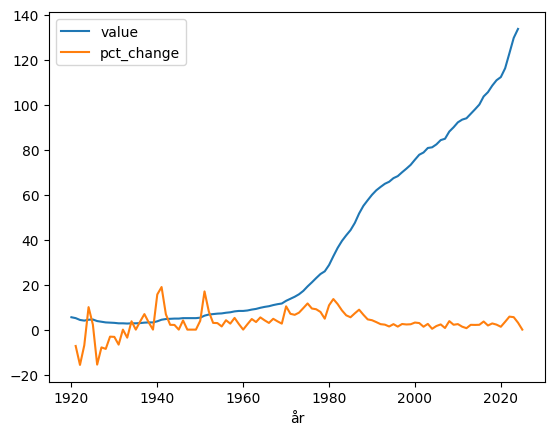

In [115]:
df.plot(kind='line')

In [116]:
# BNP
POST_URL_bnp = 'https://data.ssb.no/api/v0/no/table/09842'


api_bnp = {
  "query": [
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "BNP"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

BNP = requests.post(POST_URL_bnp, json = api_bnp)
print(BNP)
bnp_data = pyjstat.Dataset.read(BNP.text)
bnp_df = bnp_data.write('dataframe')
bnp_df.set_index('år', inplace=True)

<Response [200]>


<Axes: xlabel='år'>

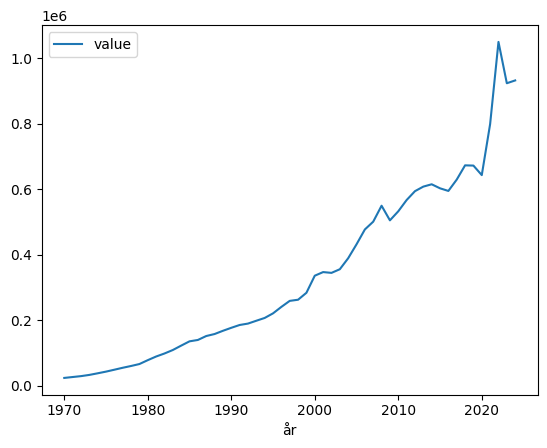

In [117]:
bnp_df.plot(kind='line')

In [118]:
POST_URL_lonn = 'https://data.ssb.no/api/v0/no/table/09174/'


api_lonn = {
  "query": [
    {
      "code": "NACE",
      "selection": {
        "filter": "vs:NRNaeringPubAgg",
        "values": [
          "nr23_6"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Lonn"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


lonn = requests.post(POST_URL_lonn, json = api_lonn)
lonn_data = pyjstat.Dataset.read(lonn.text)
lonn_df = lonn_data.write('dataframe')
lonn_df.set_index('år', inplace=True)

In [119]:
lonn_df["pct_change"] = lonn_df["value"].pct_change() * 100

In [120]:
lonn_df.head()

,næring,statistikkvariabel,value,pct_change
år,,,,
1970,Totalt for næringer,Lønn (mill. kr),38167,NaN
1971,Totalt for næringer,Lønn (mill. kr),43559,14.127388
1972,Totalt for næringer,Lønn (mill. kr),48507,11.359306
1973,Totalt for næringer,Lønn (mill. kr),53782,10.874719
1974,Totalt for næringer,Lønn (mill. kr),61743,14.802350


<Axes: xlabel='år'>

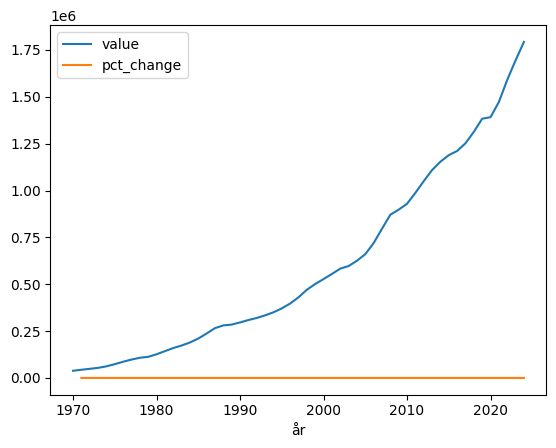

In [121]:
lonn_df.plot(kind='line')

In [51]:
POST_URL_ledighet = 'https://data.ssb.no/api/v0/no/table/13760/'

api_ledighet = {
  "query": [
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "item",
        "values": [
          "25-74"
        ]
      }
    },
    {
      "code": "Justering",
      "selection": {
        "filter": "item",
        "values": [
          "T"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "ArbledProsArbstyrk"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

ledighet = requests.post(POST_URL_ledighet, json = api_ledighet)
ledighet_data = pyjstat.Dataset.read(ledighet.text)
ledighet_df = ledighet_data.write('dataframe')

In [52]:
ledighet_df.head()

,kjønn,alder,type justering,statistikkvariabel,måned,value
0,Begge kjønn,25-74 år,Trend,Arbeidsledige i prosent av arbeidsstyrken,2006M01,2.9
1,Begge kjønn,25-74 år,Trend,Arbeidsledige i prosent av arbeidsstyrken,2006M02,2.8
2,Begge kjønn,25-74 år,Trend,Arbeidsledige i prosent av arbeidsstyrken,2006M03,2.7
3,Begge kjønn,25-74 år,Trend,Arbeidsledige i prosent av arbeidsstyrken,2006M04,2.6
4,Begge kjønn,25-74 år,Trend,Arbeidsledige i prosent av arbeidsstyrken,2006M05,2.5


<Axes: xlabel='måned'>

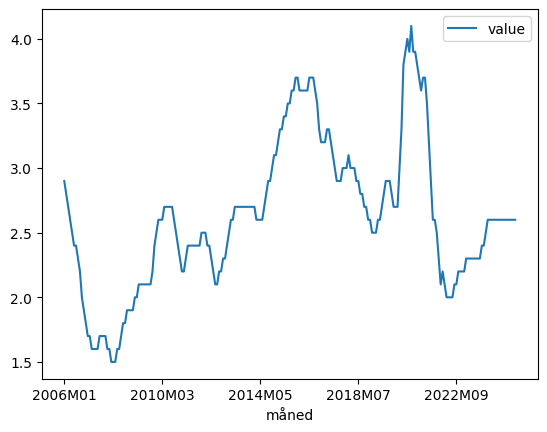

In [53]:
ledighet_df.plot(x='måned', y='value', kind='line')

In [97]:
ledighet_år = (
    ledighet_df
      .assign(year=lambda d: d["måned"].str[:4].astype(int))
      .groupby("year")["value"]
      .mean()
      .rename("UNRATE")
      .to_frame()
)

In [122]:
POST_URL_olje = 'https://data.ssb.no/api/v0/no/table/12463/'

api_olje = {
  "query": [
    {
      "code": "Marked",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "NaringUtenriks",
      "selection": {
        "filter": "vs:NaringPPI1",
        "values": [
          "SNN06_TOT"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Indeksnivo"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

olje = requests.post(POST_URL_olje, json = api_olje)
olje_data = pyjstat.Dataset.read(olje.text)
olje_df = olje_data.write('dataframe')
olje_df.set_index('år', inplace=True)

In [123]:
olje_df["pct_change"] = olje_df["value"].pct_change() * 100

<Axes: xlabel='år'>

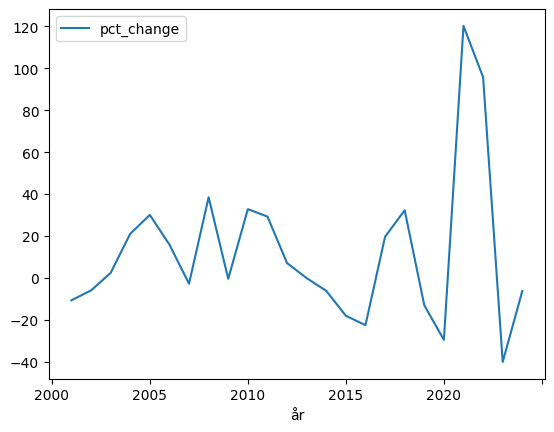

In [124]:
olje_df.plot(y='pct_change', kind='line')

In [109]:
url = 'https://data.norges-bank.no/api/data/IR/A.KPRA.SD.?format=csv&startPeriod=1995-05-12&endPeriod=2025-05-12&locale=no&bom=include'

df_rente = pd.read_csv(url,
    sep=';',
    parse_dates=['TIME_PERIOD'],
    decimal='.' )
df_rente = df_rente.rename(columns={"TIME_PERIOD": "date",
                        "OBS_VALUE":   "policy_rate"})
df_rente.set_index("date", inplace=True)


# keep only date and ploicy_rate

df_rente = df_rente[["policy_rate"]]

# make policy_rate numeric, swap , with .

df_rente['policy_rate'] = df_rente['policy_rate'].str.replace(',', '.')
df_rente['policy_rate'] = pd.to_numeric(df_rente['policy_rate'])

df_rente.index = df_rente.index.year
print(df_rente.head())


      policy_rate
date             
1996         4.48
1997         3.38
1998         5.51
1999         6.35
2000         6.22


<Axes: xlabel='date'>

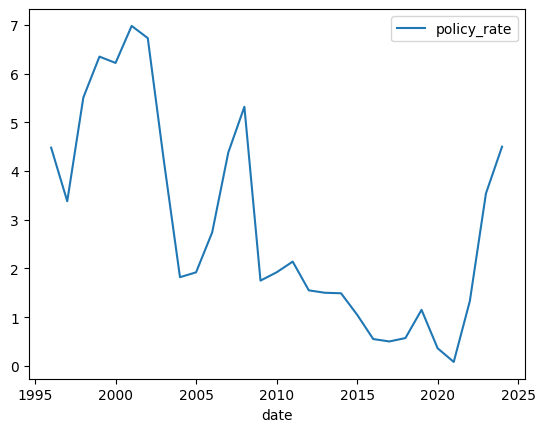

In [108]:
df_rente.plot(kind="line")

In [131]:
# make the model

data = pd.concat([df, bnp_df, lonn_df, ledighet_år, olje_df, df_rente], axis=1)

In [132]:
data



,måned,statistikkvariabel,value,pct_change,statistikkvariabel,value,næring,statistikkvariabel,value,pct_change,UNRATE,marked,næring/varegruppe,statistikkvariabel,value,pct_change,policy_rate
1920,Årsgjennomsnitt,Konsumprisindeks (2015=100),5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,Årsgjennomsnitt,Konsumprisindeks (2015=100),5.1,-7.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,Årsgjennomsnitt,Konsumprisindeks (2015=100),4.3,-15.686275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,Årsgjennomsnitt,Konsumprisindeks (2015=100),4.0,-6.976744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,Årsgjennomsnitt,Konsumprisindeks (2015=100),4.4,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.98
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.73
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.21
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
